### Passenger Satisfaction Survey

Customer satisfaction should be at the forefront of all major companies priorities. Airlines industry is the same as it needs to continously devise mechanisms of customer satisfaction measurements.

The goals in this project are to analyze the data collected by the airline company and to build a model that predicts whether or not a passenger will be satisfied with the airline and be able to use the airline in the future. As a satisfied passenger is more likely to use an airline again than that of an unsatisfied passenger.

If you can predict passengers which likely to be unsatisfied, it might be possible to identify factors that contribute to them being unsatisfied and adjust to their needs.

The two problems this project tries to solve are:
- how likely is a passenger be unsatisified with the airline services?
- what factors most contribute to a passenger becoming unsatisfied with the services before and during a flight?

In [357]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The data source used in this project is available [here](https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction)

In [465]:
df=pd.read_csv('airline_passenger_satisfaction.csv')

In [466]:
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [404]:
#df.info()

In [467]:
df['satisfaction'].value_counts(normalize=True)*100

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64

It is a fairly balanced dataset with 56.55% of the passengers neutral or satisfied with the airline while 43.44 % were satisfied with the airlines services.

### Exploratory Data Analysis (EDA)

#### Check for possible missing values

In [468]:
df.isna().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

The dataset looks fairly clean.All the features except the column' arrival_delay_in_minutes' had no missing values. Since only 0.3% of the 'arrival_delay_in_minutes' column was missing, we can drop the missing values.

In [407]:
#print('percent_missing: ' + str((df.isna().sum()/len(df))*100))

In [408]:
df=df.dropna().reset_index(drop=True)

In [409]:
df.isna().sum()

index                                0
Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

##### Check for Duplicated records

In [410]:
len(df[df.duplicated()==True])

0

There was no duplicated observations in the dataset

#### Check for Possible Outliers

In [411]:
df.describe(include=np.number)

,index,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64936.242797,64936.242797,0.492590,0.183138,39.428761,0.309236,0.593704,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,37495.095812,37495.095812,0.499947,0.386781,15.117597,0.462180,0.621371,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32455.500000,32455.500000,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64938.000000,64938.000000,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97408.500000,97408.500000,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129879.000000,129879.000000,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [412]:
def outlier_calculator(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    outliers=df[(df<lower_limit)|(df>upper_limit)]
    return outliers

In [413]:
df.columns

Index(['index', 'Unnamed: 0', 'Gender', 'customer_type', 'age',
       'type_of_travel', 'customer_class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [414]:
outlier_distance=outlier_calculator(df['flight_distance'])
len(outlier_distance)

2847

<Axes: xlabel='age'>

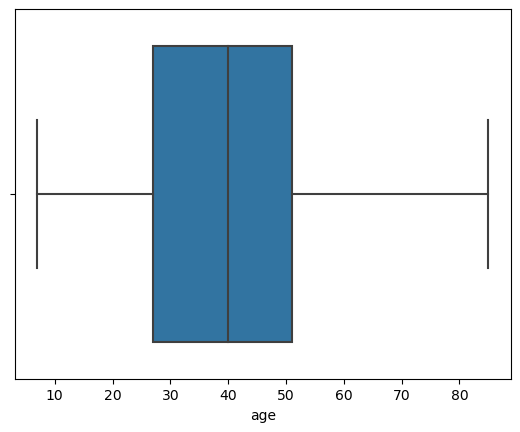

In [415]:
sns.boxplot(data=df,x='age')

In [416]:
#sns.countplot(y=df.customer_type)

In [417]:
#sns.boxplot(data=df,x='flight_distance')

In [418]:
outlier = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outlier.append(i)
    return outlier

In [299]:
len(detect_outliers_zscore(df.departure_delay_in_minutes))

2716

In [300]:
len(detect_outliers_zscore(df.age))

2741

The box plot visualization shows us a number of outliers in some of the columns. However, these are true outliers,legitimate anomalies that show the true variation in the column. So We keep these extreme values. 

During model development, Tree based models that we will be using for prediction can perform well even when there is presence of outliers. 

#### Visualization

Now let's examine variables that we are interested in, and create plots to visualize relationships between variables.

More interactive visualization is done using Tableau.

<Axes: xlabel='age', ylabel='Count'>

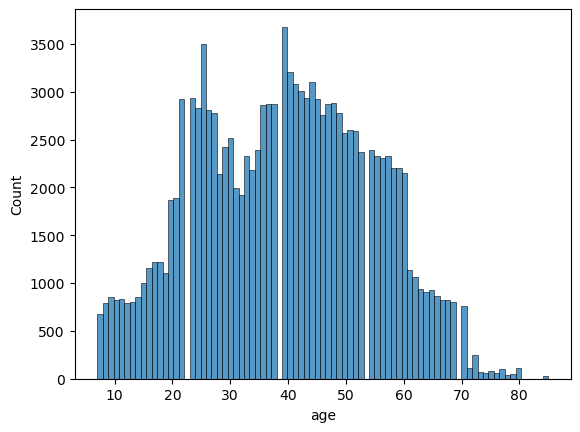

In [462]:
sns.histplot(df.age)

<Axes: xlabel='satisfaction', ylabel='ease_of_online_booking'>

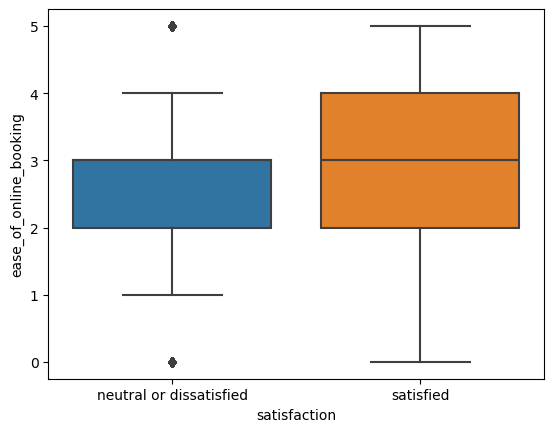

In [139]:
sns.boxplot(data=df,y='ease_of_online_booking',x='satisfaction')

Satisfied passengers had a on average higher ease of online booking ratings compared to those who were either neutral or dissatisfied.

<Axes: xlabel='online_boarding', ylabel='Count'>

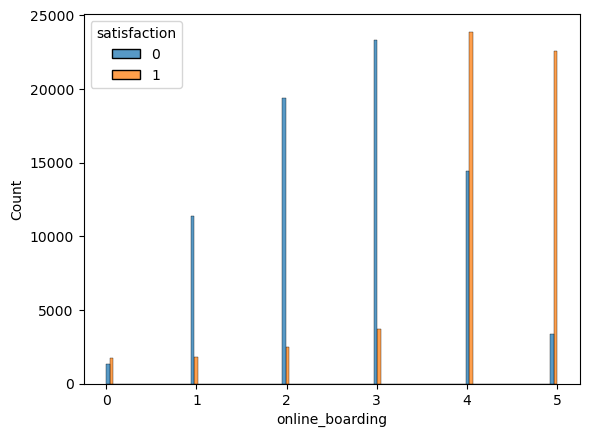

In [459]:
sns.histplot(data=df,x='online_boarding',hue='satisfaction',multiple='dodge')

<Axes: xlabel='count', ylabel='customer_class'>

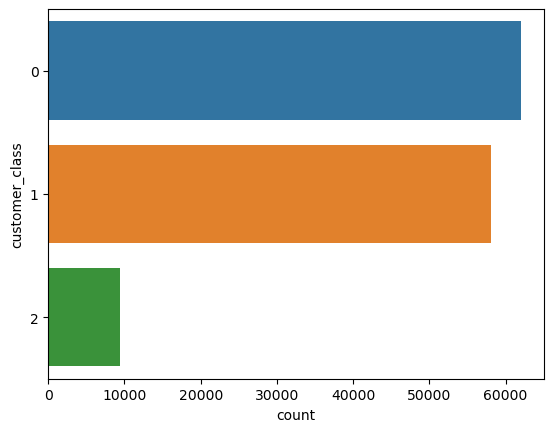

In [364]:
sns.countplot(y=df.customer_class)

In [153]:
df.groupby(['satisfaction'])[['online_boarding']].agg([np.median,np.mean])

online_boarding          
                                 median      mean
satisfaction                                     
neutral or dissatisfied             3.0  2.658846
satisfied                           4.0  4.025648

In [154]:
df.groupby(['satisfaction'])[['departure_delay_in_minutes']].agg([np.median,np.mean])


departure_delay_in_minutes           
                                            median       mean
satisfaction                                                 
neutral or dissatisfied                        0.0  16.340184
satisfied                                      0.0  12.435001

<Axes: xlabel='customer_class', ylabel='seat_comfort'>

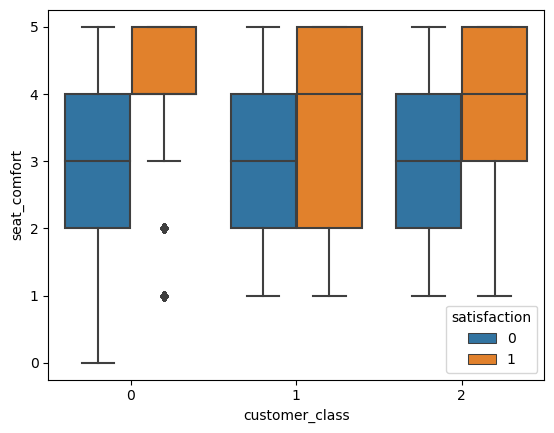

In [376]:
sns.boxplot(data=df,y='seat_comfort',x='customer_class',hue='satisfaction')

<Axes: xlabel='inflight_entertainment', ylabel='satisfaction'>

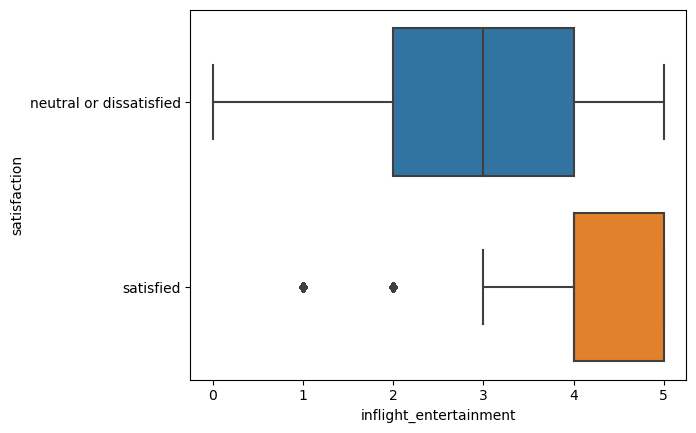

In [188]:
sns.boxplot(data=df,x='inflight_entertainment',y='satisfaction')

<Axes: xlabel='seat_comfort', ylabel='inflight_entertainment'>

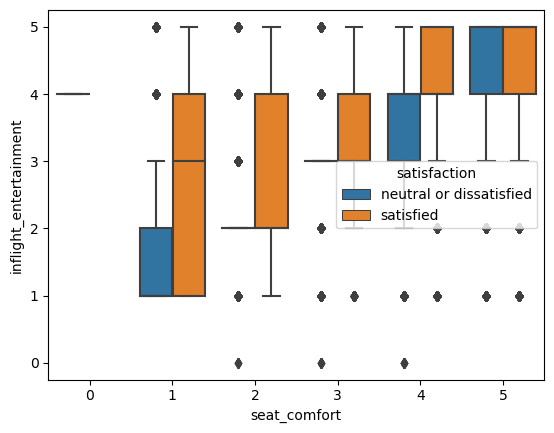

In [190]:
sns.boxplot(data=df,y='inflight_entertainment',x='seat_comfort',hue='satisfaction')

Satisfied passengers had a much better seat comfort and inflight entertainement experience on the planes than that the neutral or dissatisfied pasengers.

##### CHeck for Multicollinearity

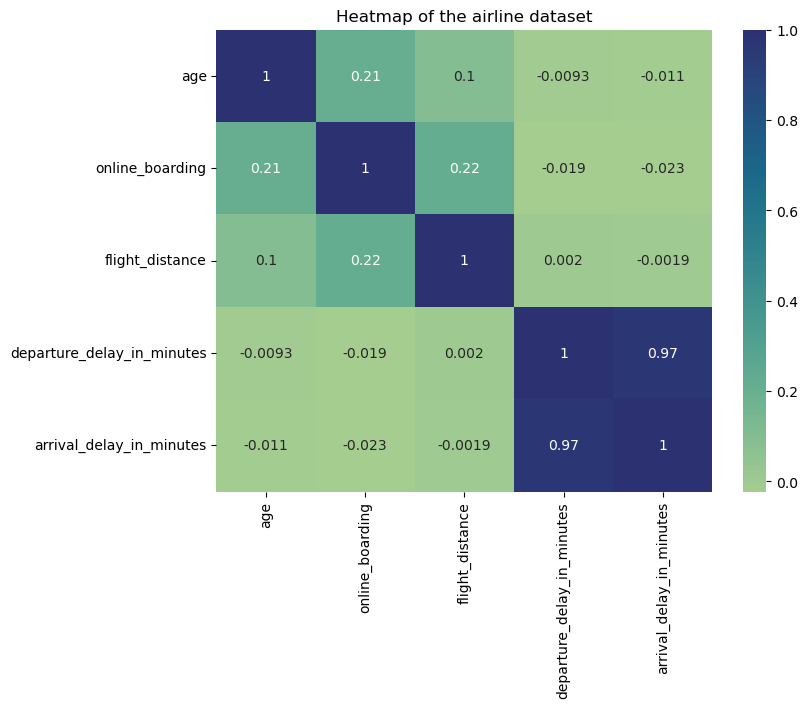

In [174]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age','online_boarding','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']].corr()
                                ,annot=True,cmap='crest')
plt.title('Heatmap of the airline dataset')
plt.show()


'arrival_delay_in_minutes' and 'departure_delay_in_minutes' are highly correlated. We can drop arrival delay column as any delays on arrival time could be caused by delays in departure.

##### Data Pre-Processing and Feature Transformation

Now it is time for data pre-processing before building a machine learning model. Most machine learning algorithms can not work with categorical data. We need to transform the categorical columns in the dataset to numeric data.

In [420]:
df.columns

Index(['index', 'Unnamed: 0', 'Gender', 'customer_type', 'age',
       'type_of_travel', 'customer_class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [194]:
df.head()

,index,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Let's create two column types numerical and categorical columns and drop unwanted ones like 'unnamed' and the highly correlated one we see in the previous section 'arrival_delay_in_minutes'

In [421]:
num_columns=['age','flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes']
cat_columns=['Gender',
       'type_of_travel', 'customer_class', 'customer_type']
target_variable=['satisfaction']

In [422]:
le=LabelEncoder()
df.satisfaction=le.fit_transform(df.satisfaction)
df.satisfaction.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [423]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

for category in cat_columns:
    df[category] = label_encoding.fit_transform(df[category])

X = df[num_columns + cat_columns]
y = df[target_variable]

In [424]:
X.shape

(129487, 21)

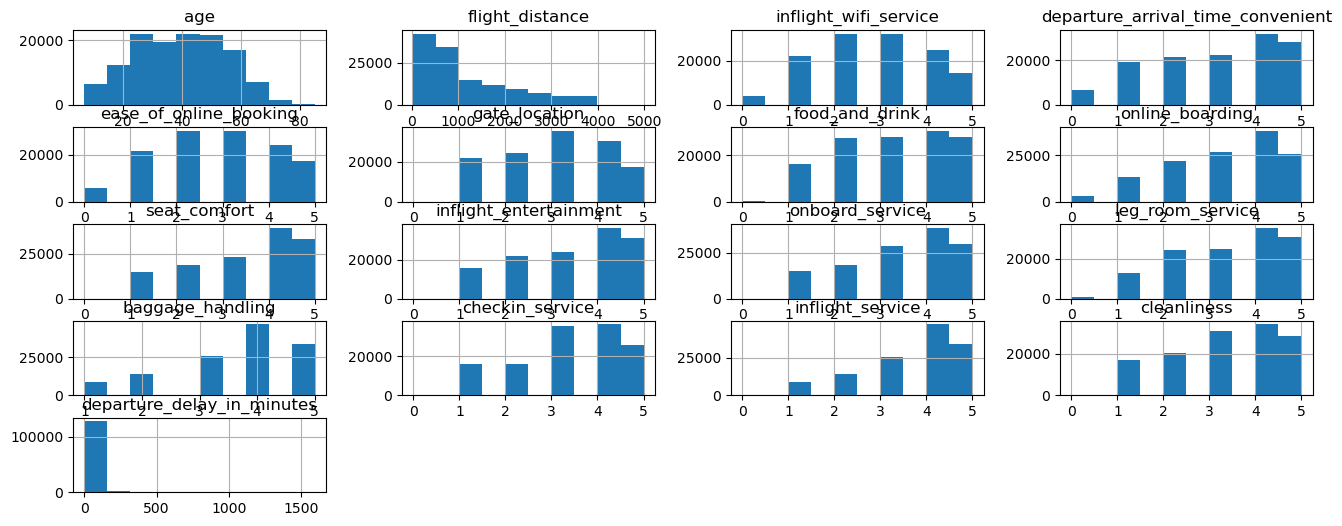

In [425]:
df[num_columns].hist(figsize=(16,6))
plt.show()

We have to use normalization such as MinMaxScalar or StandardScaler technique to normalize the distributions of these features.

#### Model Development

Split the dataset in to trainning and testing dataset using train_test_split function.

Let's split the data in to trainning and testing set with 80% and 20% respectively. 
Our dataset have features that are on different ranges, and units of measurements. This extreme variation could lead us to difficulties in training the model or biased model performance, we need to scale the the dataset using StandardScalar method.

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

from sklearn import preprocessing

scaler=preprocessing.StandardScaler()

X_train = pd.DataFrame(
    data = scaler.fit_transform(X_train),
    columns = X_train.columns
    )

X_test = pd.DataFrame(
    data = scaler.fit_transform(X_test),
    columns = X_test.columns
    )

In [430]:
X_train.shape

(103589, 21)

In [431]:
y_train.shape

(103589, 1)

In [432]:
X_test.shape

(25898, 21)

The goal of the project is to build a model that predicts whether passengers would be predicted to be either dissatified or satisfied in their flights. It is a classification problem and Logistic regression model or tree based models such as random forest, decision tree or XGBOOST models can be used.

##### A. Logistic Regression Model

In order to use logistic regression models, certain assumptions have to be met with the data we have. These assumptions are:

- The outcome variable should be binary
- Linear relationship between each predictors and logit of the response variable
- No multicollinearity between our predictors
- No extreme outliers
- The observations in the dataset are independent of each other
- Large sample size

In [433]:
log_data=df.copy()

In [434]:
log_model=LogisticRegression(max_iter=500).fit(X_train,y_train)


/Users/yonastena/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [435]:
log_model.coef_

array([[-0.11940906, -0.00347797,  0.53794269, -0.20512643, -0.21247556,
         0.02995571, -0.01847609,  0.83274687,  0.08954536,  0.05332815,
         0.40406889,  0.32966999,  0.16408311,  0.42292964,  0.15099023,
         0.30236714, -0.18107767,  0.02813218, -1.31241298, -0.31590675,
        -0.80266827]])

In [436]:
log_model.intercept_

array([-0.49955834])

In [437]:
y_pred=log_model.predict(X_test)

In [438]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [439]:
log_model.predict_proba(X_test)

array([[0.10665955, 0.89334045],
       [0.47765569, 0.52234431],
       [0.7440485 , 0.2559515 ],
       ...,
       [0.06691354, 0.93308646],
       [0.08174429, 0.91825571],
       [0.77396841, 0.22603159]])

Use confusion matrix to visualize the results of the logistic regression model

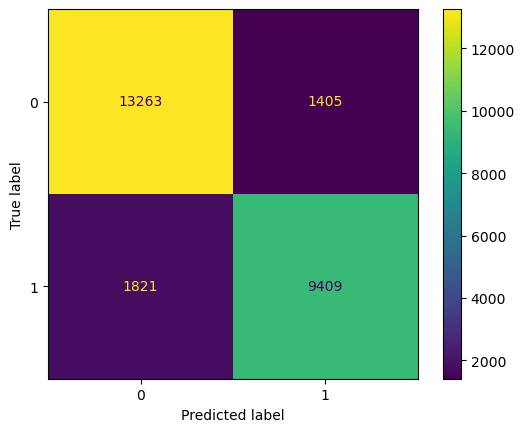

In [440]:
log_cm=confusion_matrix(y_test,y_pred,labels=log_model.classes_)

log_model_disp=ConfusionMatrixDisplay(log_cm,display_labels=log_model.classes_)

log_model_disp.plot(values_format='')
plt.show()

Create a classification report

In [441]:
target_names = ['Predicted would be neutral/dissatisfied ', 'Predicted would be satisfied']
print(classification_report(y_test, y_pred, target_names=target_names))

                                          precision    recall  f1-score   support

Predicted would be neutral/dissatisfied        0.88      0.90      0.89     14668
            Predicted would be satisfied       0.87      0.84      0.85     11230

                                accuracy                           0.88     25898
                               macro avg       0.87      0.87      0.87     25898
                            weighted avg       0.88      0.88      0.88     25898



Accuracy is a very good metric to use for balanced data

In [442]:
Acc_LogR=metrics.accuracy_score(y_test,y_pred)
Acc_LogR

0.8754343964784925

The classification report above shows that the logistic regression model above had a precision score of 87% , recall score of 84%,acuuracy score of 88%, AUC score of 87% and f1-score of 85%.

In [443]:
print("Accuracy_LogR:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))
print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy_LogR: 0.875434
Precision: 0.870076
Recall: 0.837845
F1 Score: 0.853656
AUC Score: 0.871029


##### B.Decision Tree

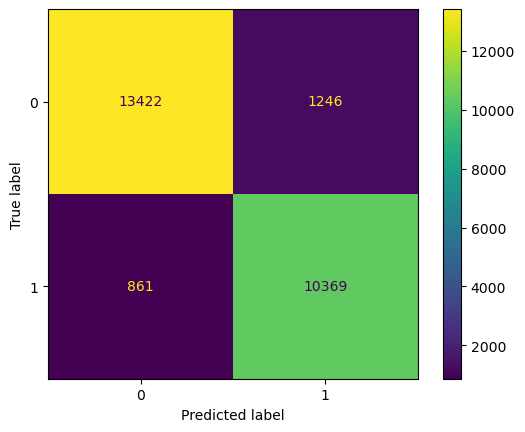

In [444]:
dt=DecisionTreeClassifier(max_depth=6,random_state=42).fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_cm=confusion_matrix(y_test,y_pred_dt,labels=log_model.classes_)

dt_disp=ConfusionMatrixDisplay(dt_cm,display_labels=dt.classes_)

dt_disp.plot(values_format='')
plt.show()

In [445]:
Acc_dt=metrics.accuracy_score(y_test,y_pred_dt)
Acc_dt

0.9186423662058846

In [446]:
print("Accuracy_decisiontree:", "%.6f" % metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_dt))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_dt))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_dt))
print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred_dt))

Accuracy_decisiontree: 0.918642
Precision: 0.892725
Recall: 0.923330
F1 Score: 0.907770
AUC Score: 0.919192


##### C. Random Forest

/Users/yonastena/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



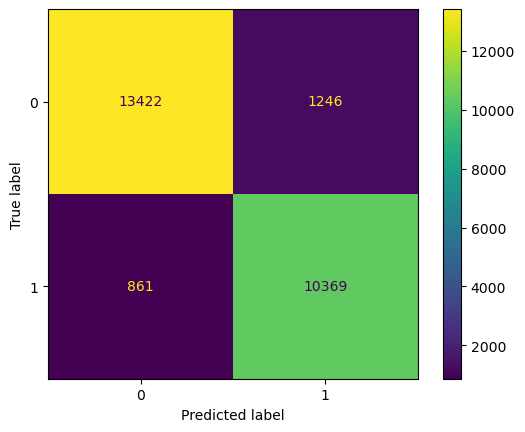

In [447]:
rf=RandomForestClassifier(max_depth=6,n_estimators=500,random_state=42).fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
rf_cm=confusion_matrix(y_test,y_pred_rf,labels=log_model.classes_)

rf_disp=ConfusionMatrixDisplay(rf_cm,display_labels=dt.classes_)

dt_disp.plot(values_format='')
plt.show()

In [449]:
Acc_rf=metrics.accuracy_score(y_test,y_pred_rf)
Acc_rf

0.9274461348366669

In [450]:
print("Accuracy_randomforest:", "%.6f" % metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_rf))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_rf))
print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred_rf))

Accuracy_randomforest: 0.927446
Precision: 0.921558
Recall: 0.910151
F1 Score: 0.915819
AUC Score: 0.925419


##### D.XGBoost

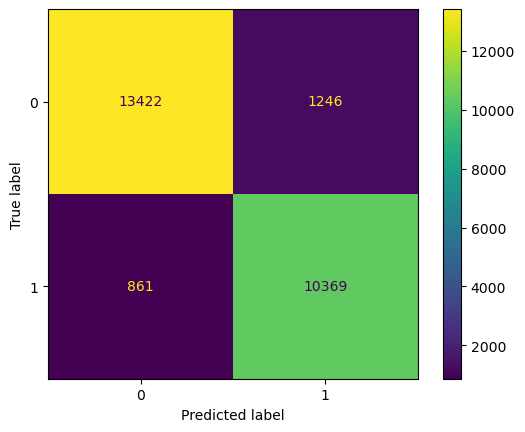

In [451]:
xgb=XGBClassifier(max_depth=6,n_estimators=500,random_state=42).fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
xgb_cm=confusion_matrix(y_test,y_pred_xgb,labels=log_model.classes_)

xgb_disp=ConfusionMatrixDisplay(xgb_cm,display_labels=dt.classes_)

dt_disp.plot(values_format='')
plt.show()

In [456]:
Acc_xgb=metrics.accuracy_score(y_test,y_pred_xgb)
Acc_xgb

0.8733879064020388

In [453]:
print("Accuracy_Xgboost:", "%.6f" % metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_xgb))
print("AUC Score:", "%.6f" % metrics.roc_auc_score(y_test, y_pred_xgb))

Accuracy_Xgboost: 0.873388
Precision: 0.847296
Recall: 0.863669
F1 Score: 0.855404
AUC Score: 0.872249


In [457]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression',  'Decision Tree Classifier', 'Random Forest Classifier','XgBoost'],
    'Score' : [Acc_LogR,  Acc_dt, Acc_rf, Acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.927446
1,Decision Tree Classifier,0.918642
0,Logistic Regression,0.875434
3,XgBoost,0.873388


In [458]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

The random forest model performed better and had a higher accuracy 92.74 % and is the champion model for prediction.

What features contribute more to an airline passenger to be satisfied or unsatisfied and come back again in the futre?

##### Feature Importance

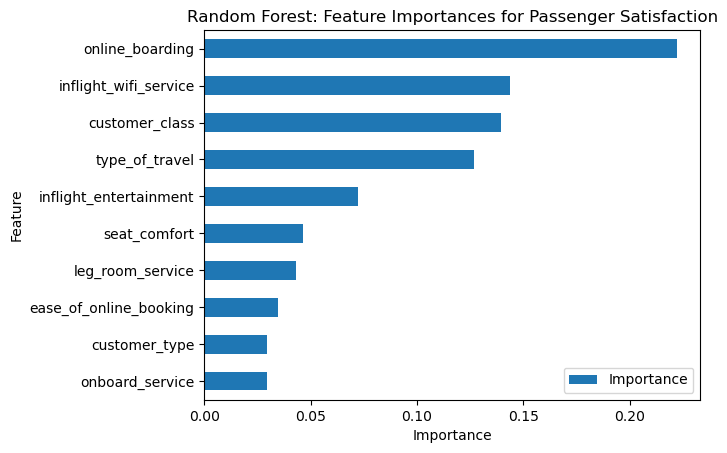

In [360]:
# Get feature importances
feat_impt = rf.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Passenger Satisfaction", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

#### Conclusion and Recommendations

The most important factors when it comes to passenger satisfaction for the airline was online boarding availability and ratings, inflight wifi service availability and ratings, customer class (whether one is using Business or Eco or Eco plus customer),type of travel (whether it is a business or personal travel). 

The airline need to improve its service in Eco and Eco Plus Customer class where the majority of its customers are clearly unsatisfied with the services.

Th three best areas the airline performed best was the inflight service, The Baggage handling,the seat comfort. However, it has fared very poorly on Ease of online booking, and inflight wifi service. The airline performed 12.1 % and 15% below the average on their online booking and inflight wifi services respectively.

The airline also need to do better on its access to its gate location as the service was average. 